<a href="https://colab.research.google.com/github/Priya-gawhane/CODSOFT/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependecies

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

Data Collection and preprocessing

In [2]:
with open("train_data.txt", encoding="utf8") as f:
    train_content = f.readlines()

with open("test_data_solution.txt", encoding="utf8") as f:
    content_test = f.readlines()

train = pd.DataFrame([element.split(":::") for element in train_content], columns=[
    'ID', 'TITLE', "GENRE", 'DESCRIPTION']).drop(columns=['ID'])

test = pd.DataFrame([element.split(":::") for element in content_test], columns=[
    'ID', 'TITLE', "GENRE", 'DESCRIPTION']).drop(columns=['ID'])

In [3]:
train.to_csv("train_data.csv", index=False)
test.to_csv("test_data.csv", index=False)

In [4]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [80]:
train.head()

,TITLE,GENRE,clean_description,input
0,Oscar et la dame rose (2009),drama,listen conversation doctor parent year old osc...,Oscar et la dame rose (2009) listen conversa...
1,Cupid (1997),thriller,brother sister past incestuous relationship cu...,Cupid (1997) brother sister past incestuous ...
2,"Young, Wild and Wonderful (1980)",adult,bus empty student field trip museum natural hi...,"Young, Wild and Wonderful (1980) bus empty s..."
3,The Secret Sin (1915),drama,help unemployed father make end meet edith twi...,The Secret Sin (1915) help unemployed father...
4,The Unrecovered (2007),drama,film title refer recover body grind zero also ...,The Unrecovered (2007) film title refer reco...


checking the number of rows and columns

In [6]:
train.shape, test.shape

((14390, 3), (11303, 3))

EDA

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14390 entries, 0 to 14389
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        14390 non-null  object
 1   GENRE        14390 non-null  object
 2   DESCRIPTION  14390 non-null  object
dtypes: object(3)
memory usage: 337.4+ KB


checking the null values

In [8]:
train.duplicated().sum()

0

In [9]:
train.describe()

,TITLE,GENRE,DESCRIPTION
count,14390,14390,14390
unique,14390,27,14378
top,Oscar et la dame rose (2009),drama,A retired professor has returned to his estat...
freq,1,3591,3


In [10]:
train.loc[train['DESCRIPTION'].str.contains(r'@\S+')].head()

,TITLE,GENRE,DESCRIPTION
242,Túlvilági beszélö (1992),documentary,Mail <svaradi@sprynet.com> for translation. T...
1880,Rokonok (1954),drama,Mail <svaradi@sprynet.com> for translation. F...
1986,Lila akác (1934),comedy,Mail <svaradi@sprynet.com> for translation. S...
6579,A csúnya lány (1935),comedy,Mail <svaradi@sprynet.com> for translation. D...
8296,Füszer és csemege (1940),drama,Mail <svaradi@sprynet.com> for translation. 5...


In [11]:
train.loc[train['DESCRIPTION'].str.contains(r'http\S+')].head()

,TITLE,GENRE,DESCRIPTION


installing langdetect

In [14]:
!pip install langdetect

In [15]:
from langdetect import detect
lang_count=0
def detect_language(text):

    #for tracking the progress
    global lang_count
    lang_count=lang_count+1
    print(lang_count)

    #returning the code of language if found else unknown
    try:
        return detect(text)
    except:
        return 'Unknown'

In [16]:
train['Language'] = train['DESCRIPTION'].apply(detect_language)
test['Language'] = test['DESCRIPTION'].apply(detect_language)

Streaming output truncated to the last 5000 lines.
20694
20695
20696
20697
20698
20699
20700
20701
20702
20703
20704
20705
20706
20707
20708
20709
20710
20711
20712
20713
20714
20715
20716
20717
20718
20719
20720
20721
20722
20723
20724
20725
20726
20727
20728
20729
20730
20731
20732
20733
20734
20735
20736
20737
20738
20739
20740
20741
20742
20743
20744
20745
20746
20747
20748
20749
20750
20751
20752
20753
20754
20755
20756
20757
20758
20759
20760
20761
20762
20763
20764
20765
20766
20767
20768
20769
20770
20771
20772
20773
20774
20775
20776
20777
20778
20779
20780
20781
20782
20783
20784
20785
20786
20787
20788
20789
20790
20791
20792
20793
20794
20795
20796
20797
20798
20799
20800
20801
20802
20803
20804
20805
20806
20807
20808
20809
20810
20811
20812
20813
20814
20815
20816
20817
20818
20819
20820
20821
20822
20823
20824
20825
20826
20827
20828
20829
20830
20831
20832
20833
20834
20835
20836
20837
20838
20839
20840
20841
20842
20843
20844
20845
20846
20847
20848
20849
20850
20851
2

Checking the language distribution

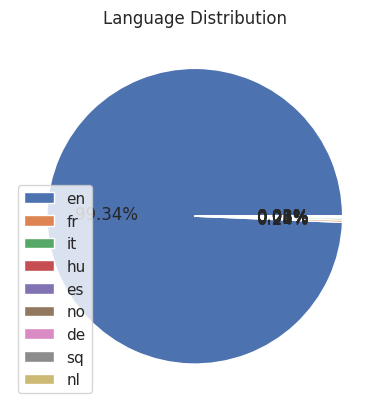

In [17]:
plt.pie(train.Language.value_counts().values.tolist(),autopct='%.2f%%')
plt.legend(labels=train.Language.value_counts().index.tolist(),loc='lower left')
plt.title('Language Distribution')
plt.show()

In [18]:
train["Language"].value_counts()

en    14295
fr       35
it       31
hu       11
es        8
no        5
de        3
sq        1
nl        1
Name: Language, dtype: int64

Text Cleaning

In [28]:
pip install nltk

In [29]:
import re
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
def clean_text(text):

    text= text.lower() # Lowercasing the text
    text = re.sub('Mail <svaradi@sprynet.com> for translation. ', '', text) # Removing unknown mail
    text = re.sub('-',' ',text.lower())   # Replacing `x-x` as `x x`
    text = re.sub(r'@\S+', '', text) # Removing mentions
    text = re.sub(r'http\S+', '', text) # Removing Links
    text = re.sub(f'[{string.punctuation}]', '', text) # Remove punctuations
    text = re.sub(f'[{string.digits}]', '', text) # Remove numbers
    text = re.sub(r'\s+', ' ', text) # Removing unnecessary spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Removing single characters

    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    text = " ".join([i for i in words if i not in stopwd and len(i)>2]) # Removing the stop words

    return text.strip()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
import nltk
from nltk.corpus import stopwords

stopwd = set(stopwords.words('english'))

clean_text(train["DESCRIPTION"][0])

'listening conversation doctor parents year old oscar learns nobody courage tell weeks live furious refuses speak anyone except straight talking rose lady pink meets hospital stairs christmas approaches rose uses fantastical experiences professional wrestler imagination wit charm allow oscar live life love full company friends pop corn einstein bacon childhood sweetheart peggy blue'

In [37]:
# applying clean text to train as well as test.
train["clean_description"]=train["DESCRIPTION"].apply(clean_text)
test["clean_description"]=test["DESCRIPTION"].apply(clean_text)

In [38]:
train.head(5)["clean_description"]

0    listening conversation doctor parents year old...
1    brother sister past incestuous relationship cu...
2    bus empties students field trip museum natural...
3    help unemployed father make ends meet edith tw...
4    films title refers recovered bodies ground zer...
Name: clean_description, dtype: object

Checking the distribution of lengths of descriptions before and after cleaning

In [39]:
train["len_desc"] = train["DESCRIPTION"].apply(len)
train["len_clean_desc"] = train["clean_description"].apply(len)

In [40]:
train.sample(5)

,TITLE,GENRE,DESCRIPTION,Language,len_desc,clean_description,len_clean_desc
9450,A Little Bit About What Is Going On (2008),documentary,Dateline: January 1999: Spend two days with f...,en,313,dateline january spend two days famed indie fi...,219
13783,8:46 (2011),drama,8:46 is a moving and heartfelt drama followin...,en,795,moving heartfelt drama following ensemble char...,478
13734,"""Assistance"" (2014)",comedy,"Episode 1, Alice meets ""The Actress"" for the ...",en,1072,episode alice meets actress first time episode...,712
1477,Red (????/I),thriller,Based on the timeless Grimm's short story Lit...,en,564,based timeless grimms short story little red r...,407
6845,The Dialogue: An Interview with Screenwriter ...,talk-show,Robin Swicord has secured a spot as one of Ho...,en,528,robin swicord secured spot one hollywoods top ...,382


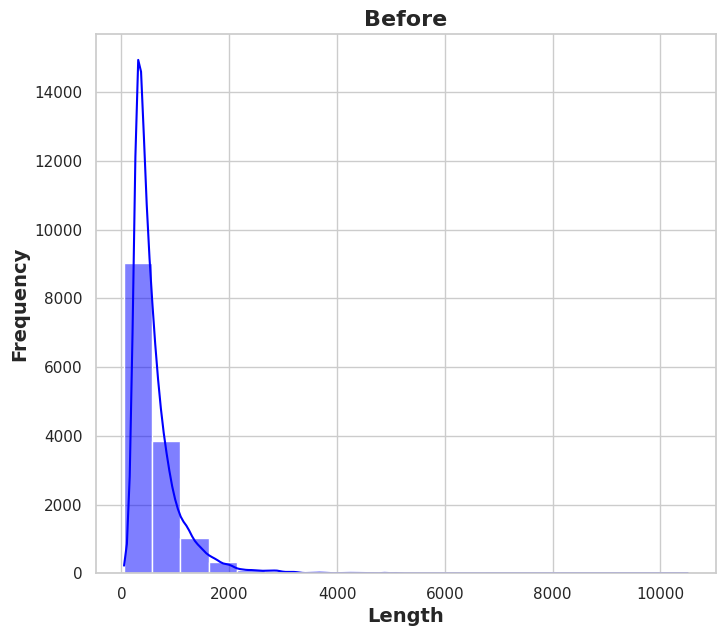

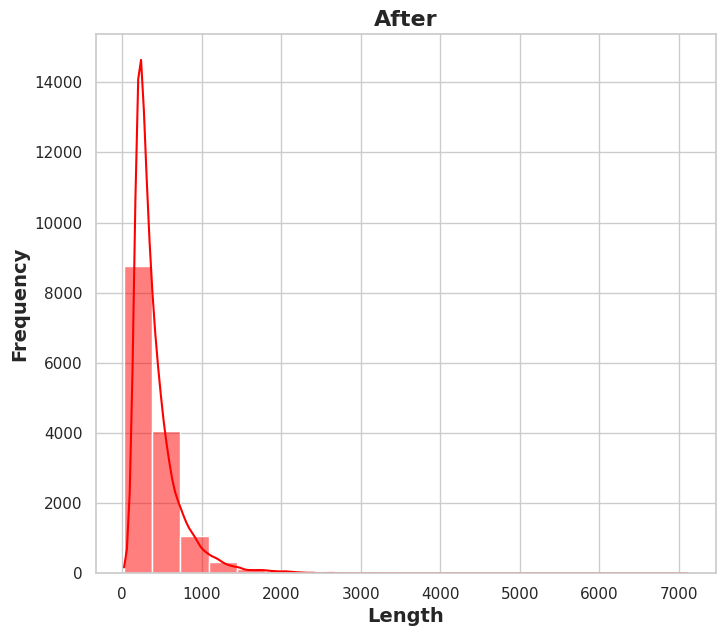

In [41]:
plt.figure(figsize=(8, 7))
sns.histplot(data=train, x='len_desc', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Before', fontsize=16, fontweight='bold')
plt.show()

plt.figure(figsize=(8, 7))
sns.histplot(data=train, x='len_clean_desc', bins=20, kde=True, color='red')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('After', fontsize=16, fontweight='bold')

plt.show()

In [42]:
#finding the number of descriptions with length greater than 2000
(train["len_clean_desc"]>2000).value_counts()

False    14336
True        54
Name: len_clean_desc, dtype: int64

In [43]:
# if length of description is greater 2000, we will truncate it randomly from 250 to 2000 because most of the description is less than 1500
train["clean_description"] = train["clean_description"].apply(lambda x: x[:np.random.randint(250,2000)] if len(x)>2000 else x)

In [44]:
#finding the number of descriptions with length greater than 2000
train["len_clean_desc"] = train["clean_description"].apply(len)
(train["len_clean_desc"]>2000).value_counts()

False    14390
Name: len_clean_desc, dtype: int64

In [46]:
!pip install deep_translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 887.5 kB/s eta 0:00:00


In [47]:
from deep_translator import GoogleTranslator
translator = GoogleTranslator()
# translating the description to english if language is not english
def trans(text):
    try:
        return translator.translate(text)
    except Exception as e:
        return text

train["clean_description"] = train.apply(lambda x: trans(x["clean_description"]) if x['Language']!='en' else x['clean_description'],axis=1)

In [48]:
train[train["Language"]!="en"].iloc[0]

TITLE                                  Divorzio alla siciliana (1963) 
GENRE                                                          comedy 
DESCRIPTION           Il barone Fifě ha bisogno di un erede per ave...
Language                                                            it
len_desc                                                           645
clean_description    Baron Fifě needs an heir to have his father's ...
len_clean_desc                                                     518
Name: 210, dtype: object

In [49]:
detect_language(train[train["Language"]!="en"].iloc[0]["clean_description"])

25694


'en'

In [50]:
import spacy
nlp = spacy.load("en_core_web_sm")
lam_cnt = 0
def lametize(text):

    #for tracking the progress
    global lam_cnt
    lam_cnt=lam_cnt+1
    print(lam_cnt)


    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

In [51]:
lametize("I am going to the store")

1


'I be go to the store'

In [52]:
train["clean_description"] = train["clean_description"].apply(lambda x: lametize(x))

Streaming output truncated to the last 5000 lines.
9392
9393
9394
9395
9396
9397
9398
9399
9400
9401
9402
9403
9404
9405
9406
9407
9408
9409
9410
9411
9412
9413
9414
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9425
9426
9427
9428
9429
9430
9431
9432
9433
9434
9435
9436
9437
9438
9439
9440
9441
9442
9443
9444
9445
9446
9447
9448
9449
9450
9451
9452
9453
9454
9455
9456
9457
9458
9459
9460
9461
9462
9463
9464
9465
9466
9467
9468
9469
9470
9471
9472
9473
9474
9475
9476
9477
9478
9479
9480
9481
9482
9483
9484
9485
9486
9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514
9515
9516
9517
9518
9519
9520
9521
9522
9523
9524
9525
9526
9527
9528
9529
9530
9531
9532
9533
9534
9535
9536
9537
9538
9539
9540
9541
9542
9543
9544
9545
9546
9547
9548
9549
9550
9551
9552
9553
9554
9555
9556
9557
9558
9559
9560
9561
9562
9563
9564
9565
9566
9567
9568
9569
9570
9571
9572
9573
9574
9575
9576
9577
9578
9579
9580
9581

In [53]:
train.sample(5)

,TITLE,GENRE,DESCRIPTION,Language,len_desc,clean_description,len_clean_desc
5336,Knock Outs (2011),comedy,When call girl Cindy gets busted under the ne...,en,430,call girl cindy gets bust new strike law recei...,288
4179,The Odd Man Out in Dixie (2017),short,This film centers around the friendship of a ...,en,640,film center around friendship young southern r...,448
4590,Who Says Folklore Can't Be Fun! (2004),documentary,'Who Says Folklore Can't Be Fun!' documentary...,en,707,say folklore can not fun documentary take fres...,465
2637,Dream Street (2010),drama,A story about the human spirits ability to ri...,en,313,story human spirit ability rise hardship trage...,224
4757,Angshumaner Chhobi (2009),drama,"Angshuman, a young film director, comes back ...",en,1685,angshuman young film director come back italy ...,1051


In [54]:
train.drop(columns=["len_desc","len_clean_desc","Language","DESCRIPTION"],inplace=True)

Merging title and Description

In [55]:
train["input"] = train["TITLE"]+" "+train["clean_description"]
test["input"] = test["TITLE"]+" "+test["clean_description"]

In [56]:

train["GENRE"].unique(),train["GENRE"].unique().shape


(array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
        ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
        ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
        ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
        ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
        ' musical ', ' war '], dtype=object),
 (27,))

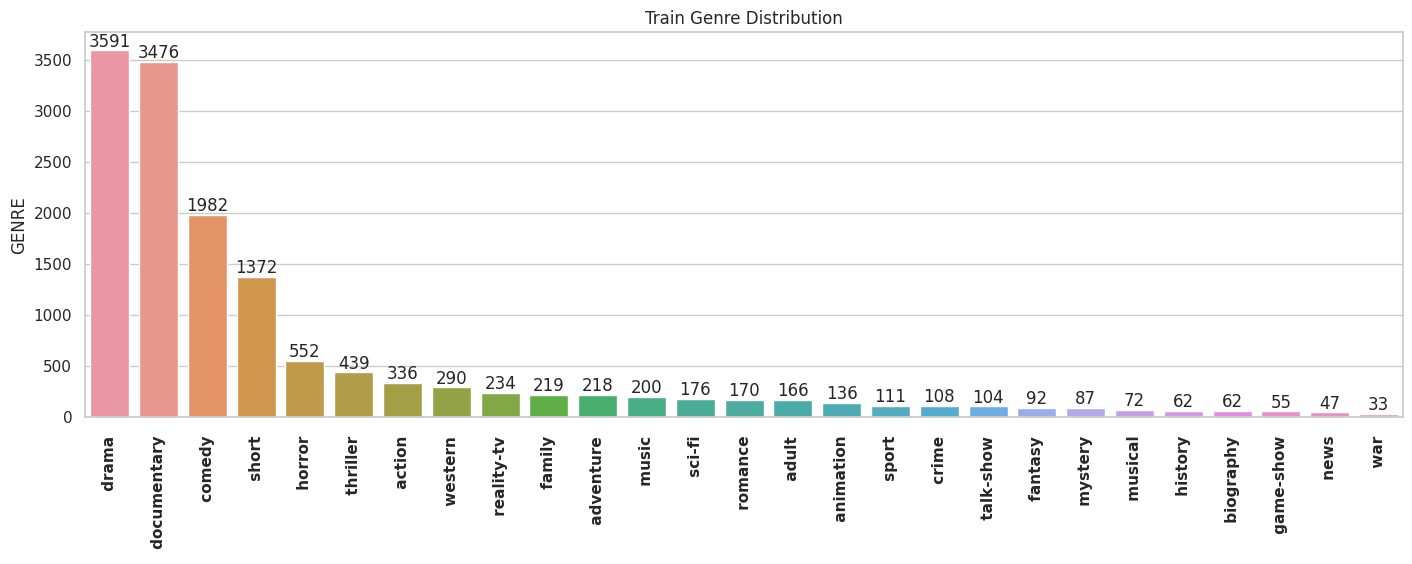

In [57]:
plt.subplots(figsize=(17, 5))
ax1 = sns.barplot(x=train["GENRE"].value_counts().index,
            y=train["GENRE"].value_counts())
ax1.bar_label(ax1.containers[0])
plt.title("Train Genre Distribution")
plt.xticks(rotation=90,fontweight="bold")
plt.show()

Vectorizing using tfidf

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

# removing stopwords
# removing words with frequency lower than 20 in the whole corpus
# ngram(1,2) i.e if text is: "this is a sentence"
# then vectors will be like:
# this, is, a, sentence, this is, is a, a sentence.

tfidf = TfidfVectorizer(stop_words='english',max_features=35000)


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

# removing stopwords
# removing words with frequency lower than 20 in the whole corpus
# ngram(1,2) i.e if text is: "this is a sentence"
# then vectors will be like:
# this, is, a, sentence, this is, is a, a sentence.

tfidf = TfidfVectorizer(stop_words='english',max_features=35000)


In [60]:
X_train_transformed = tfidf.fit_transform(train["input"])
X_test_transformed = tfidf.transform(test["input"])

In [61]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=42)
# We will pass to it the output of TfidfVectorizer from train data
x_train_resampled, y_train_resampled = sampler.fit_resample(
    X_train_transformed, train['GENRE'])

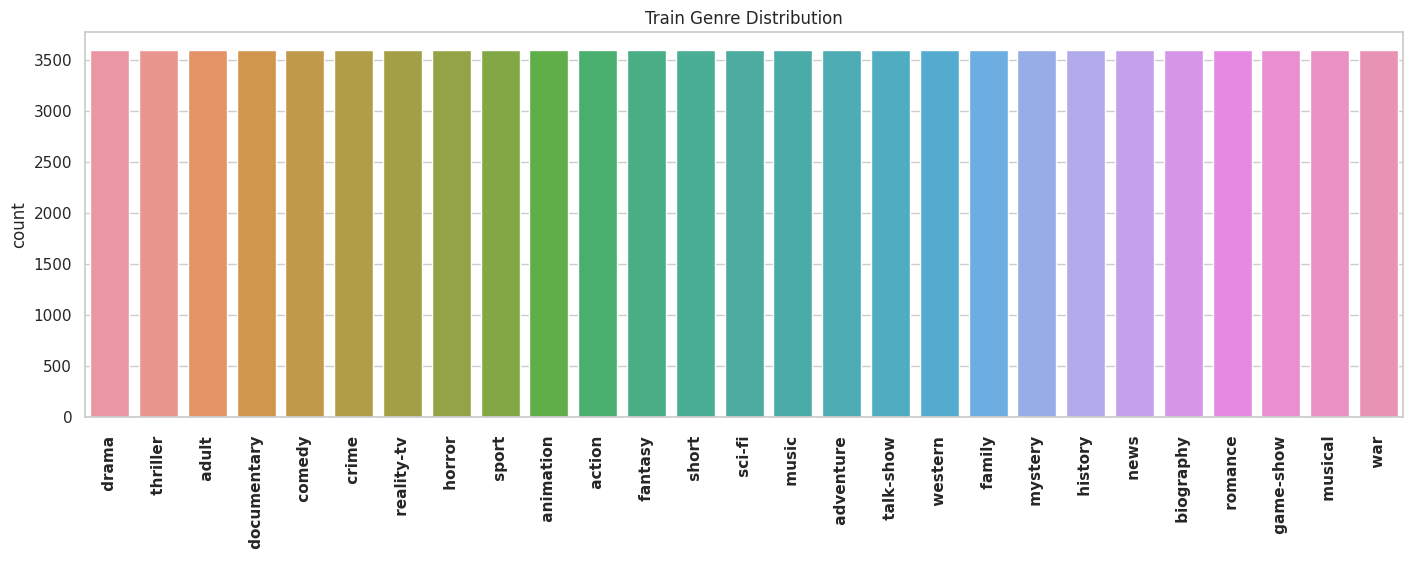

In [62]:
plt.subplots(figsize=(17, 5))
sns.countplot(data=y_train_resampled,x=y_train_resampled.values)
plt.title("Train Genre Distribution")
plt.xticks(rotation=90,fontweight="bold")
plt.show()

In [63]:
x_train_resampled.shape, y_train_resampled.shape

((96957, 35000), (96957,))

In [64]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train_resampled)
y_test = encoder.transform(test["GENRE"])

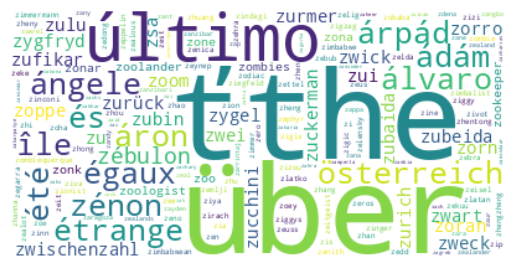

In [65]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    max_words=200, background_color="white").generate_from_frequencies(tfidf.vocabulary_)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Model training

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


mnb = MultinomialNB(alpha=0.5)
gnb = GaussianNB()
bnb = BernoulliNB()
lgc = LogisticRegression(solver="sag", C=0.5, max_iter=500,
                         random_state=42, tol=0.1, n_jobs=4)
svc = LinearSVC()
rdmfr = RandomForestClassifier(n_estimators=100, random_state=42)
dcst = DecisionTreeClassifier()

In [67]:
x_train_resampled.shape,y_train.shape

((96957, 35000), (96957,))

In [68]:
lgc.fit(x_train_resampled, y_train)
lgc.score(X_test_transformed, y_test)

0.5168539325842697

In [69]:
bnb.fit(x_train_resampled, y_train)
bnb.score(X_test_transformed, y_test)

0.5028753428293373

In [70]:
mnb.fit(x_train_resampled, y_train)
mnb.score(X_test_transformed, y_test)

0.49969034769530213

In [71]:
rdmfr.fit(x_train_resampled, y_train)
rdmfr.score(X_test_transformed, y_test)

0.46580553835264976

In [72]:
svc.fit(x_train_resampled,y_train)
svc.score(X_test_transformed,y_test)

0.48606564628859594

In [73]:
ypred_test_lgc = lgc.predict(X_test_transformed)
ypred_train_lgc = lgc.predict(x_train_resampled)

ypred_test_bnb = bnb.predict(X_test_transformed)
ypred_train_bnb = bnb.predict(x_train_resampled)

ypred_test_mnb = mnb.predict(X_test_transformed)
ypred_train_mnb = mnb.predict(x_train_resampled)

ypred_test_rdmfr = rdmfr.predict(X_test_transformed)
ypred_train_rdmfr = rdmfr.predict(x_train_resampled)

ypred_test_svc = svc.predict(X_test_transformed)
ypred_train_svc = svc.predict(x_train_resampled)

In [74]:
d_train_svc = svc.predict(x_train_resampled)
from sklearn.metrics import classification_report, accuracy_score

print("Logistic Regression : ")
print("Train accuracy: ", accuracy_score(y_train, ypred_train_lgc))
print("Test accuracy: ", accuracy_score(y_test, ypred_test_lgc))

print("\n\nBernoulliNB : ")
print("Train accuracy: ", accuracy_score(y_train, ypred_train_bnb))
print("Test accuracy: ", accuracy_score(y_test, ypred_test_bnb))

print("\n\nMultinomialNB : ")
print("Train accuracy: ", accuracy_score(y_train, ypred_train_mnb))
print("Test accuracy: ", accuracy_score(y_test, ypred_test_mnb))

print("\n\nRandom Forest : ")
print("Train accuracy: ", accuracy_score(y_train, ypred_train_rdmfr))
print("Test accuracy: ", accuracy_score(y_test, ypred_test_rdmfr))

print("\n\nSupport Vector : ")
print("Train accuracy: ", accuracy_score(y_train, ypred_train_svc))
print("Test accuracy: ", accuracy_score(y_test, ypred_test_svc))

Logistic Regression : 
Train accuracy:  0.9682023990016193
Test accuracy:  0.5168539325842697


BernoulliNB : 
Train accuracy:  0.9709046278247058
Test accuracy:  0.5028753428293373


MultinomialNB : 
Train accuracy:  0.9766597563868519
Test accuracy:  0.49969034769530213


Random Forest : 
Train accuracy:  1.0
Test accuracy:  0.46580553835264976


Support Vector : 
Train accuracy:  0.9993811689718123
Test accuracy:  0.48606564628859594


Test accuracy can be improved if we apply all the preprocessing we applied to train data

<Axes: title={'center': 'Logistic Regression Test: '}>

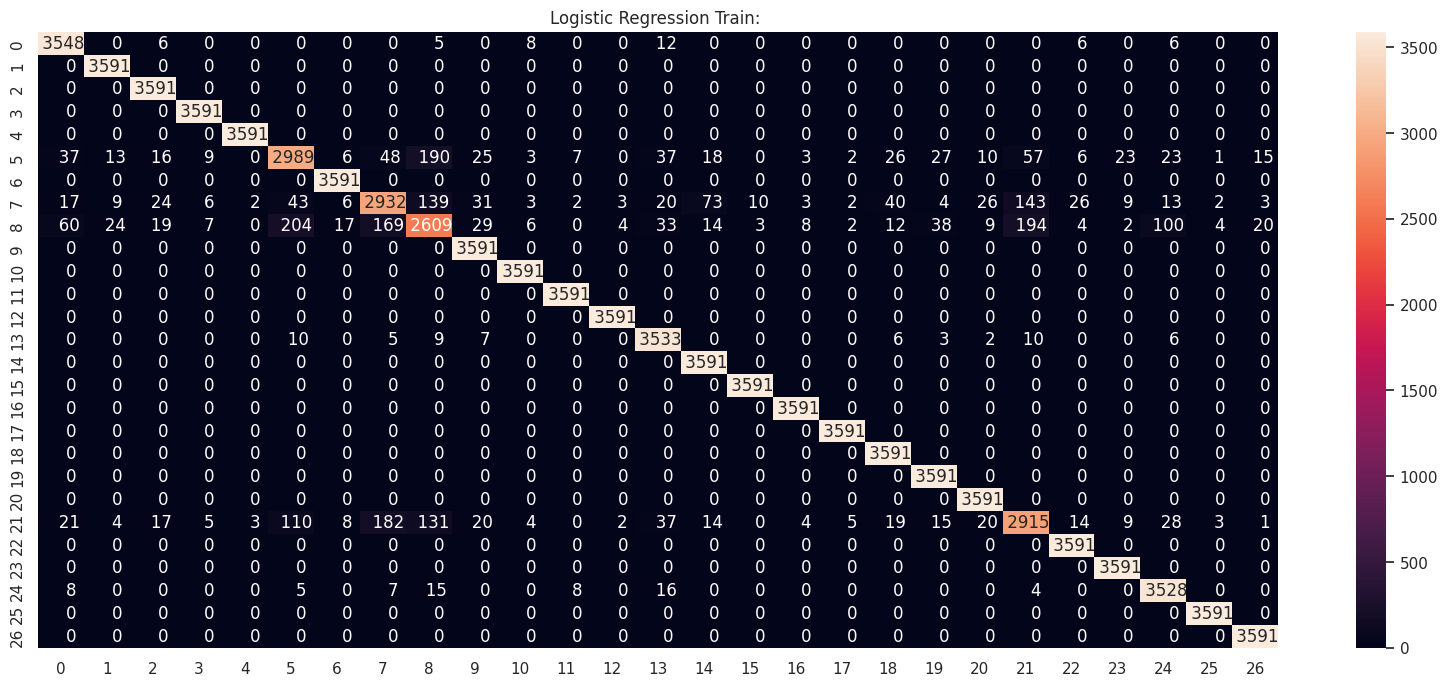

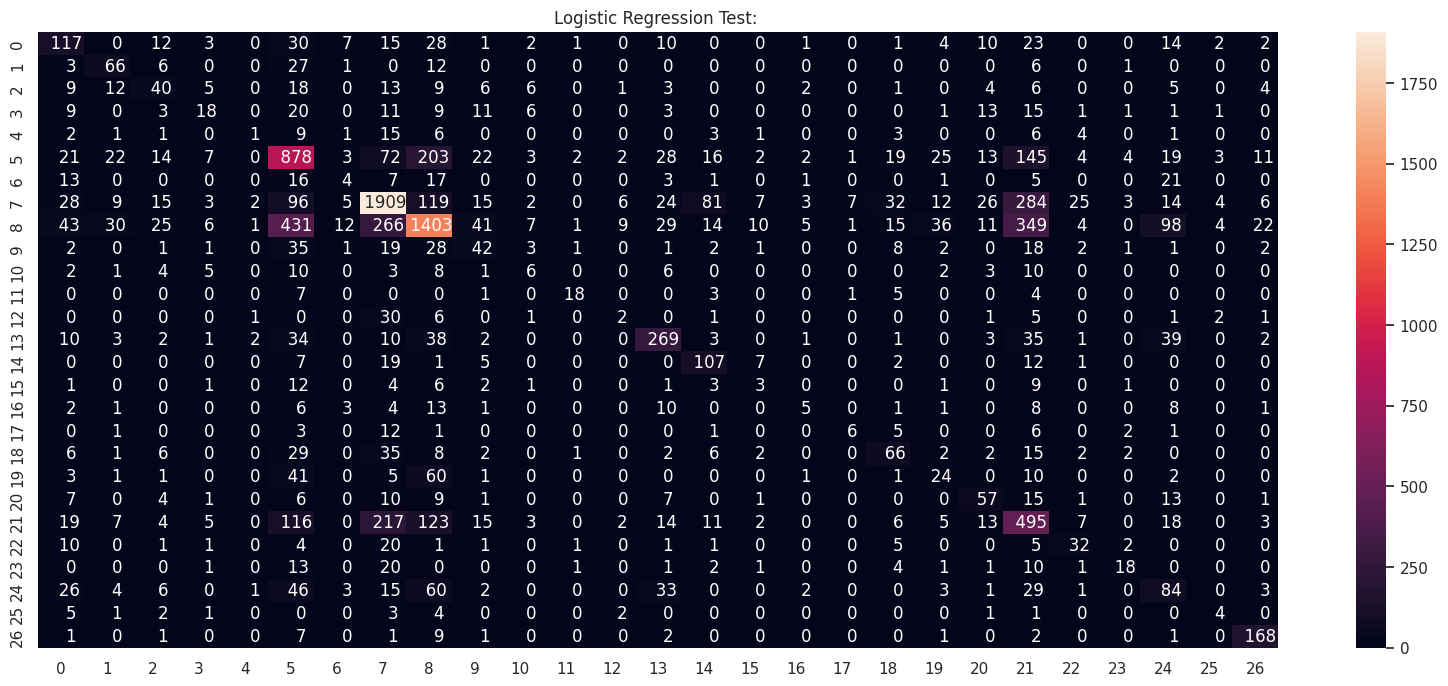

In [75]:
from sklearn.metrics import confusion_matrix,precision_score


cm1 = confusion_matrix(y_train,ypred_train_lgc)
plt.figure(figsize=(20,8))
plt.title("Logistic Regression Train: ")
sns.heatmap(cm1,annot=True,fmt="5g")

cm2 = confusion_matrix(y_test,ypred_test_lgc)
plt.figure(figsize=(20,8))
plt.title("Logistic Regression Test: ")
sns.heatmap(cm2,annot=True,fmt="5g")

In [76]:
scores = [{"Model":"Logistic Regression","Train Accuracy":0.9468998860022146,"Test Accuracy":0.5159040590405904},
         {"Model":"BernoulliNB","Train Accuracy":0.9134487458883257,"Test Accuracy":0.5271955719557195},
         {"Model":"MultinomialNB","Train Accuracy":0.9319468590753393,"Test Accuracy":0.5165313653136532},
         {"Model":"Random Forest","Train Accuracy":1.0,"Test Accuracy":0.48837638376383763},
         {"Model":"Support Vector","Train Accuracy":0.9908692943292223,"Test Accuracy":0.4830811808118081}]

scoresdf = pd.DataFrame(scores)

Exporting Models, Vectorizer, Encoder uisng Pickle

In [77]:
import pickle as pkl

In [78]:
pkl.dump(scoresdf, open("scores.pkl", "wb"))
pkl.dump(encoder, open("encoder.pkl", "wb"))
pkl.dump(tfidf, open("vectorizer.pkl", "wb"))
pkl.dump(lgc, open("logistic.pkl", "wb"))
pkl.dump(mnb, open("mnb.pkl", "wb"))
pkl.dump(bnb, open("bnb.pkl", "wb"))
pkl.dump(rdmfr, open("rdmfr.pkl", "wb"))
pkl.dump(svc, open("svc.pkl", "wb"))

Testing the XGB booster

In [79]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(x_train_resampled, y_train)
xgb.score(X_test_transformed, y_test)

0.45165000442360437